<a href="https://colab.research.google.com/github/NikkyXO/DAS_projects/blob/main/first_projects/05_Project_Identify_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Identify Data

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- World population growth rate
- Is the growth rate stable? Increasing or Declining?

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Explore and understand problem
- What data do we need to answer the problem?

In [1]:
import pandas as pd

### Step 1.b: Indentify data with world population
- There are multiple sources
- World bank: https://data.worldbank.org/indicator/SP.POP.TOTL
- Wiki: https://en.wikipedia.org/wiki/World_population
- ...and probably more


In [12]:
from google.colab import files

uploaded = files.upload()

Saving API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv to API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv


### Step 1.c: Download and import the data
- We will download it from World Bank

In [54]:
data_worldbank = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv", skiprows=4)


In [55]:
data_worldbank.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN


### Step 1.d: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [56]:
data_worldbank.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

### Step 1.e: Read the data
- Use ```pd.read_csv()``` to read the file `files/API_SP/API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- HELP: You might need to `skiprows=4`
- Apply ```.head()``` on the data to see all is as expected

In [57]:
columns = data_worldbank.columns
columns[:10]

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965'],
      dtype='object')

### Step 1.f: Get world data
- We are only insterested in data for the world.
- The data can be identified by `Country Name` (World) or `Country Code` (WLD).
- This can be done as follows:
```Python
data[data['Country Name'] == 'World']
```
- NOTE: Remember to keep data

In [67]:
world_data = data_worldbank[data_worldbank['Country Name'] == 'World']

In [68]:
world_data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
259,World,WLD,"Population, total",SP.POP.TOTL,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,...,7.085790e+09,7.169675e+09,7.254293e+09,7.339077e+09,7.424485e+09,7.509410e+09,7.592476e+09,7.673345e+09,7.752841e+09,NaN


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.dtypes```

### Step 2.b: Keep only needed columns
- We are only interested in the year columns.
- You can drop the other columns by: ```.drop(list_of_columns_to_delete, axis='columns')```
- Notice there is a `unnamed` column.
    - Remove it with `dataset.dropna(how='all', axis='columns')`

In [69]:
world_data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

In [70]:
to_drop = ['Country Name', 'Indicator Code', 'Country Code', 'Indicator Name']
data = world_data.drop(to_drop, axis='columns')

In [72]:
data = data.dropna(how='all', axis='columns')
data.dtypes

1960    float64
1961    float64
1962    float64
1963    float64
1964    float64
         ...   
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
Length: 61, dtype: object

In [73]:
data.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
259,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,3.606554e+09,...,7.002881e+09,7.085790e+09,7.169675e+09,7.254293e+09,7.339077e+09,7.424485e+09,7.509410e+09,7.592476e+09,7.673345e+09,7.752841e+09


### Step 2.c: Transpose data
- It makes sense to have years in the rows
- This can be done with `.transpose()`

In [74]:
data = data.transpose()

In [75]:
data.dtypes

259    float64
dtype: object

In [76]:
data.head()

,259
1960,3.032156e+09
1961,3.071596e+09
1962,3.124561e+09
1963,3.189656e+09
1964,3.255146e+09


### Step 2.d: Rename column
- The name 259 can be renamed as follows
- This can be done as follows
```.rename(columns={259:'World Population'})```

In [77]:
data = data.rename(columns={259:'World Population'})

In [78]:
data.head()

,World Population
1960,3.032156e+09
1961,3.071596e+09
1962,3.124561e+09
1963,3.189656e+09
1964,3.255146e+09


In [79]:
data.dtypes

World Population    float64
dtype: object

### Step 2.e: Visualize data
- This is done to check data quality
- You can plot the DataFrame with `.plot()`

<Axes: >

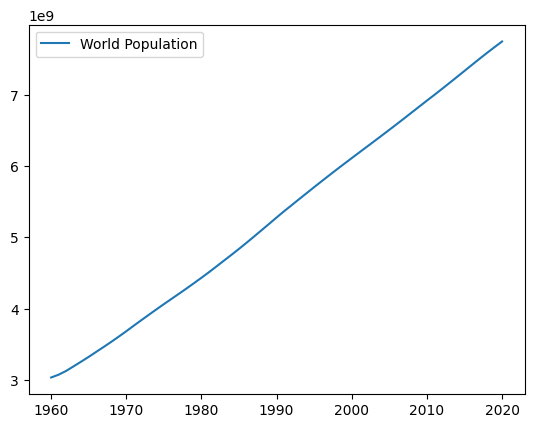

In [80]:
data.plot()

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Calculate yearly percentage change
- We want to explore the growth of the world population
- First step is to calculate the yearly growth
- This can be done with `pct_change()` ([docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html))
- Add a new column `Yearly growth` with the growth in percentage

In [81]:
data['Yearly growth'] = data.pct_change()
data.head()

,World Population,Yearly growth
1960,3.032156e+09,NaN
1961,3.071596e+09,0.013007
1962,3.124561e+09,0.017243
1963,3.189656e+09,0.020833
1964,3.255146e+09,0.020532


### Step 3.b: Visualize the Yearly growth
- Plot it with `.plot()`
- This will give you an idea of the trend.

<Axes: >

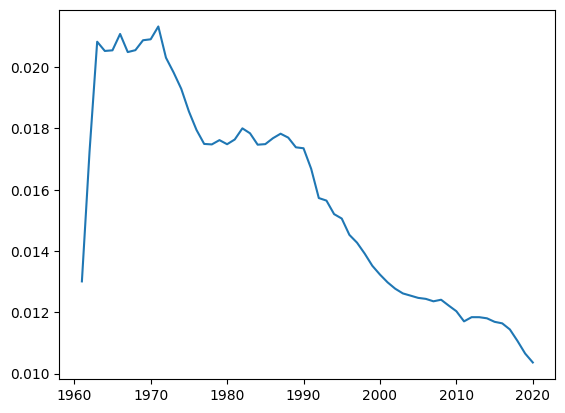

In [83]:
data['Yearly growth'].plot()

### Step 3.c: Smooth the result
- A great way is to smooth the result
- This can show local tendencies
- Calculate a 10-years rolling average by using [rolling(10)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html).[mean()](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.mean.html)
```Python
dataset['Yearly growth'].rolling(10).mean()
```
- Visualize the result
    - HINT: Make a plot containing `Yearly growth` and the new calculation.
- What does that tell you?

In [85]:
data["rolling10"] = data['Yearly growth'].rolling(10).mean()

<Axes: >

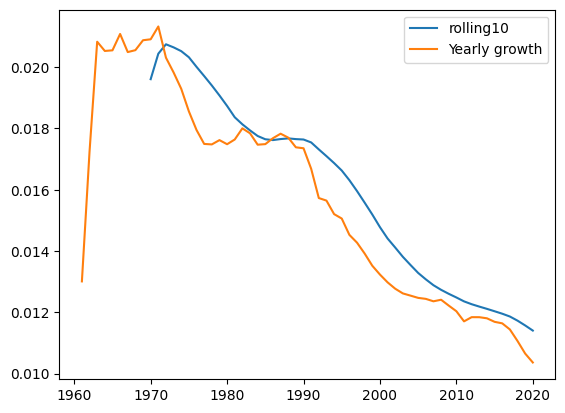

In [86]:
data[["rolling10", "Yearly growth"]].plot()

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Transform data
- To make plot more readable transform data to percentage
    - HINT: Multiply columns data `Yearly growth` and the smoothed data by 100

In [87]:
data[["rolling10", "Yearly growth"]] *= 100

<Axes: >

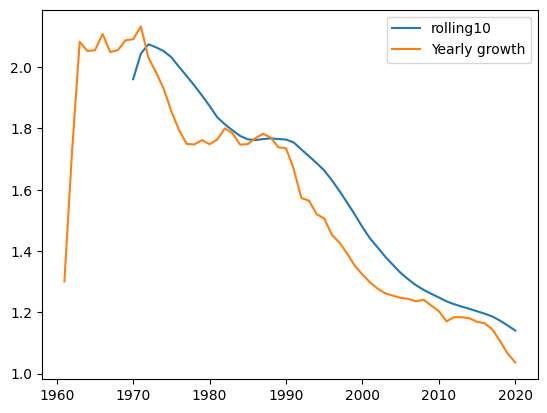

In [88]:
data[["rolling10", "Yearly growth"]].plot()

### Step 4.b: Set title and labels on axis
- In the plot set labels and axis
    - `xlabel='Year'` the same for `ylabel` and `title`

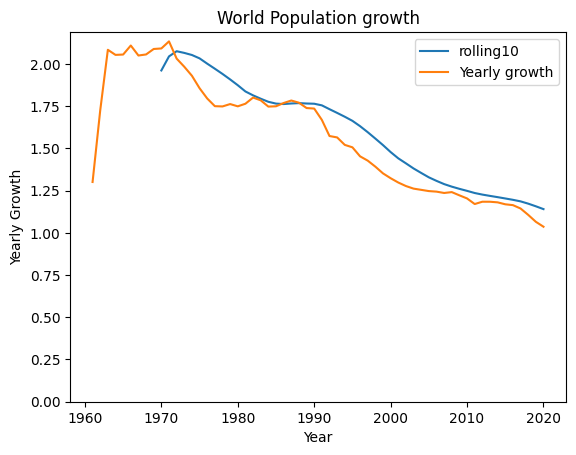

In [90]:
data[["rolling10", "Yearly growth"]].plot(xlabel='Year',title='World Population growth', ylabel='Yearly Growth', ylim=0);

### Step 4.c: Adding ranges on axis
- Add range on y-axis to make the plot more readable.
- Use `ylim=0`

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a
- Any insights to use?
- Do we need to make predictions based on it?